In [1]:
#Import libraries
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the Dataset

In [3]:
df = pd.read_csv("D:\Zomato_Reviews\Restaurant_Reviews.tsv", delimiter='\t', quoting=3)
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


<Axes: xlabel='Liked', ylabel='count'>

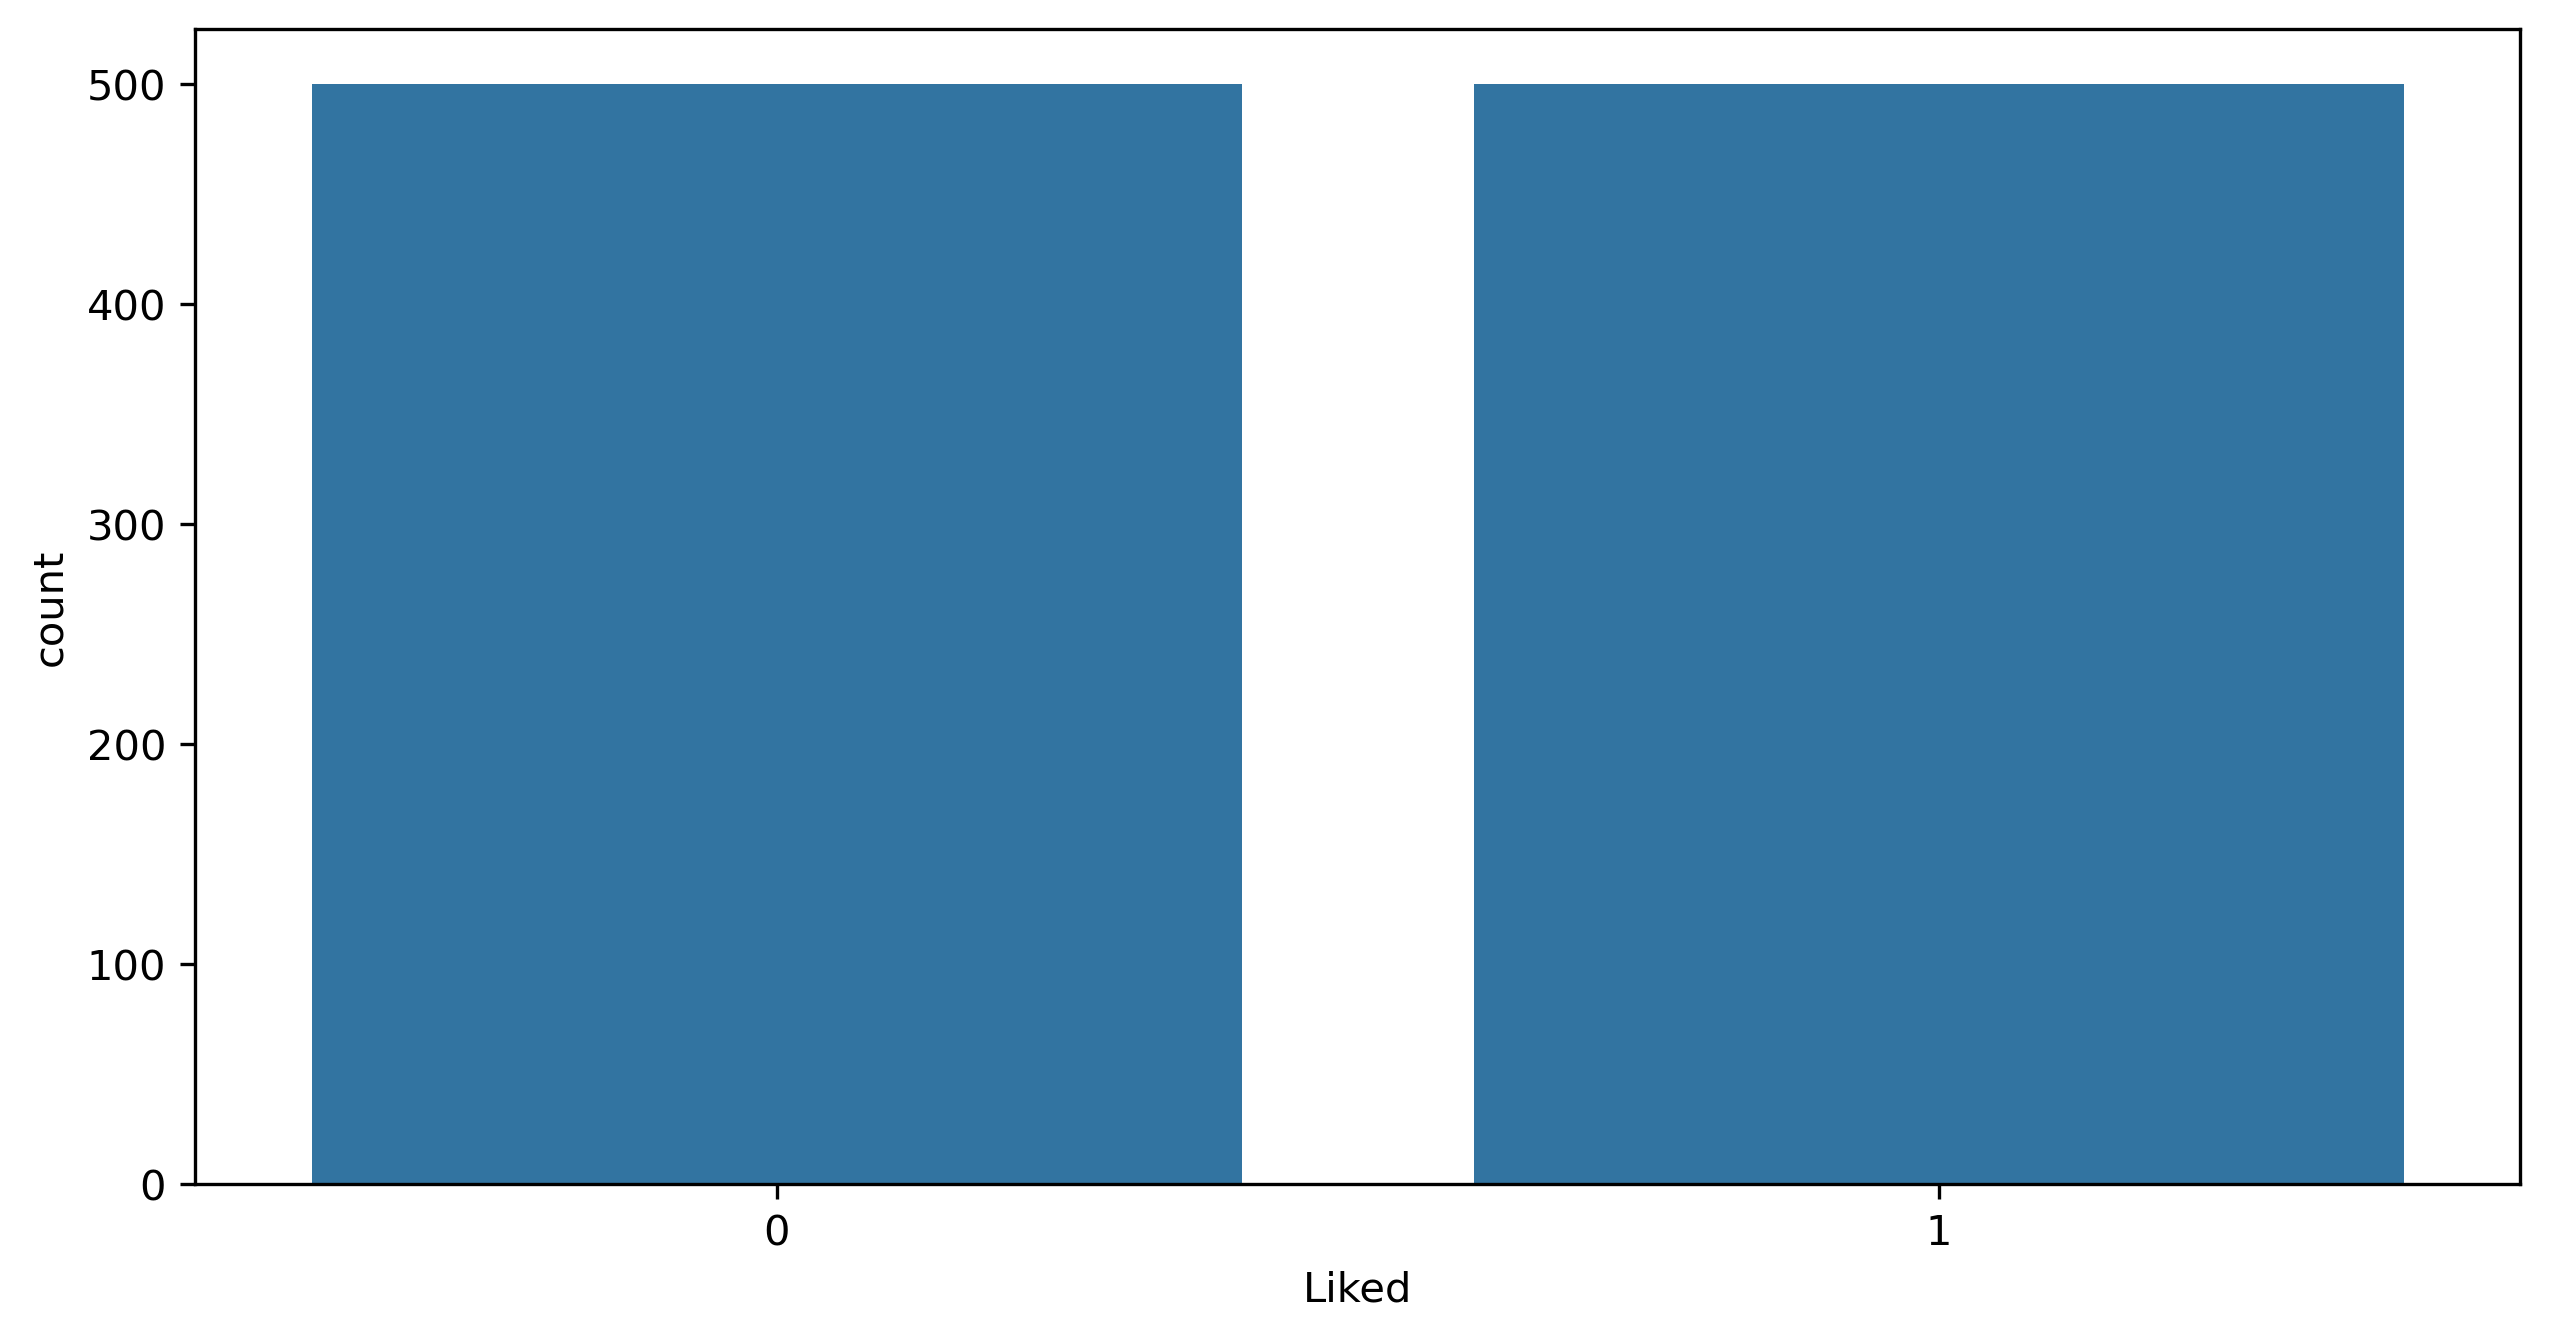

In [4]:
sns.countplot(x = df['Liked'])

In [5]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
df[df['Liked'] == 1]

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [9]:
df[df['Liked'] == 0]

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [10]:
liked = df[df['Liked'] == 1]
not_liked = df[df['Liked'] == 0]

In [11]:
liked.head()

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


In [12]:
not_liked.head()

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [13]:
#!pip install wordcloud

In [14]:
#Worldcloud function

In [15]:
liked['Review']

0                               Wow... Loved this place.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
8                              The fries were great too.
9                                         A great touch.
                             ...                        
899                         Overall, a great experience.
901    Their regular toasted bread was equally satisf...
907    The chips and sals a here is amazing!!!!!!!!!!...
909                This is my new fav Vegas buffet spot.
922    Every time I eat here, I see caring teamwork t...
Name: Review, Length: 500, dtype: object

In [16]:
not_liked['Review']

1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 500, dtype: object

In [17]:
def wordcl(data, heading):
    ratings = ' '.join(data['Review'])
    wc = WordCloud(background_color='white', width = 700, height = 200, 
                   colormap='viridis').generate(ratings)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

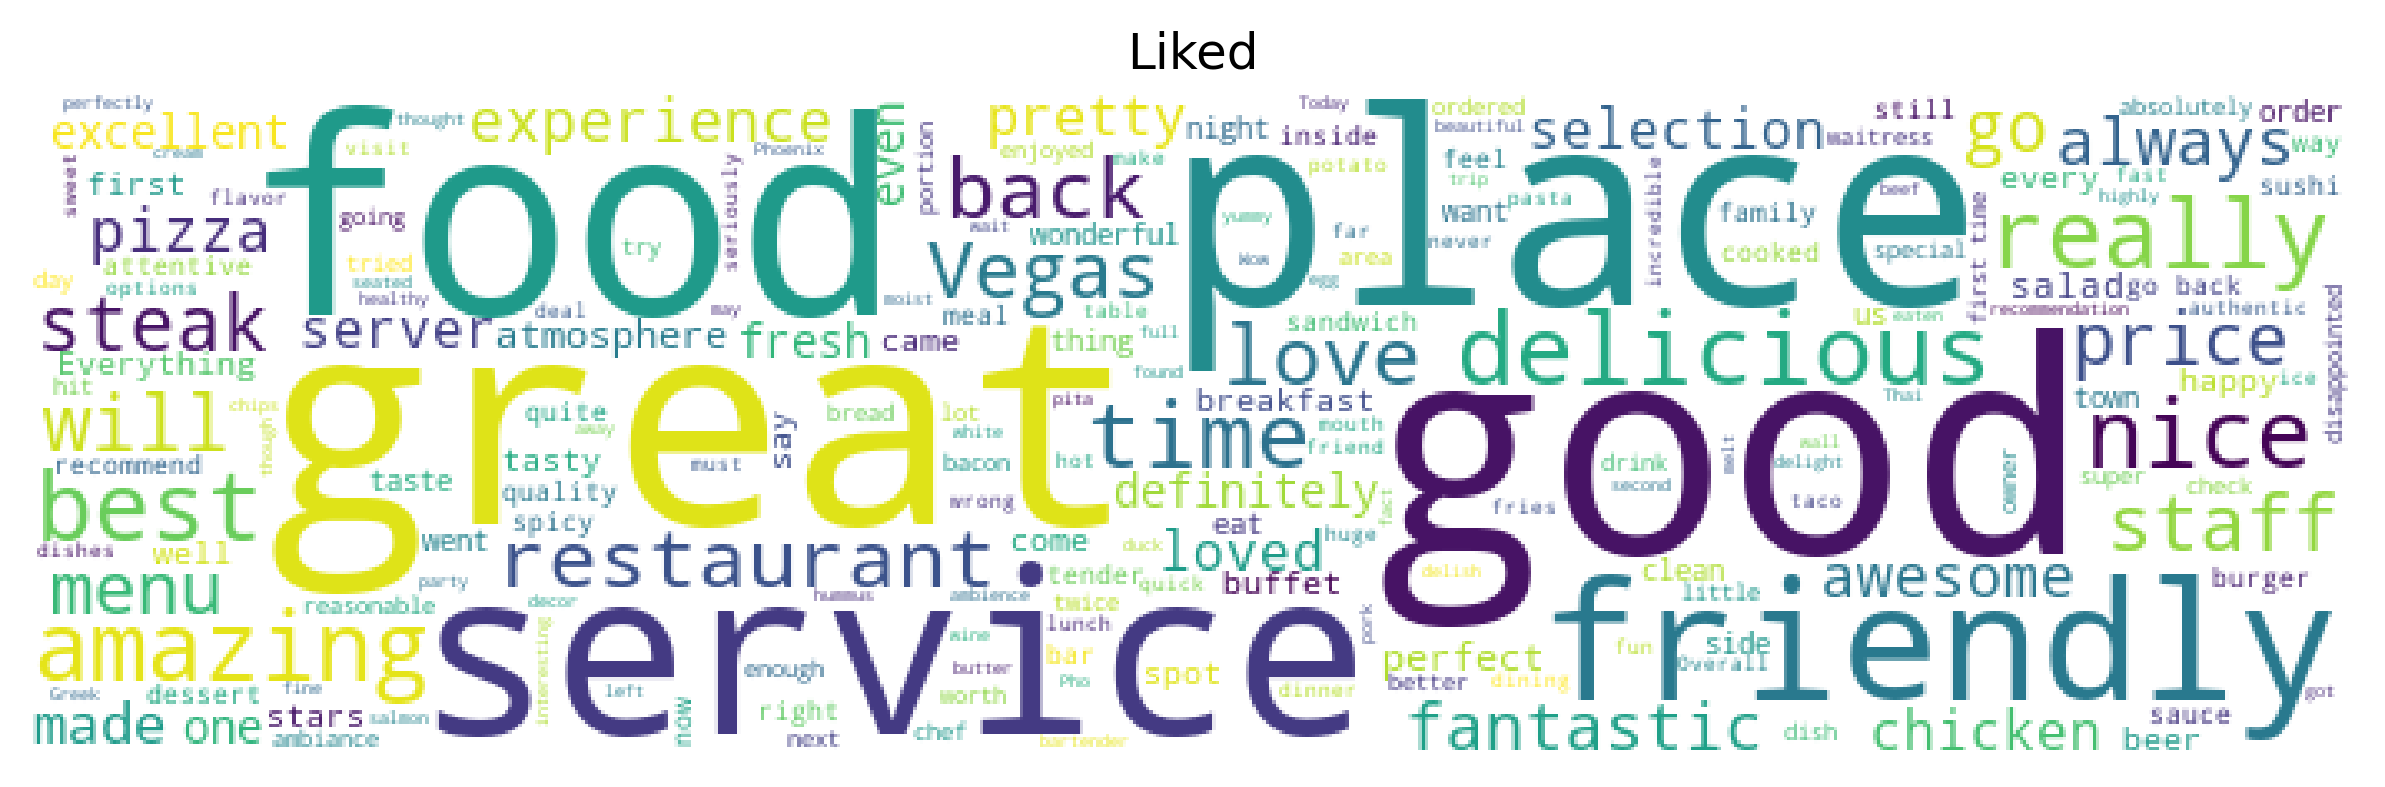

In [18]:
wordcl(liked, 'Liked')

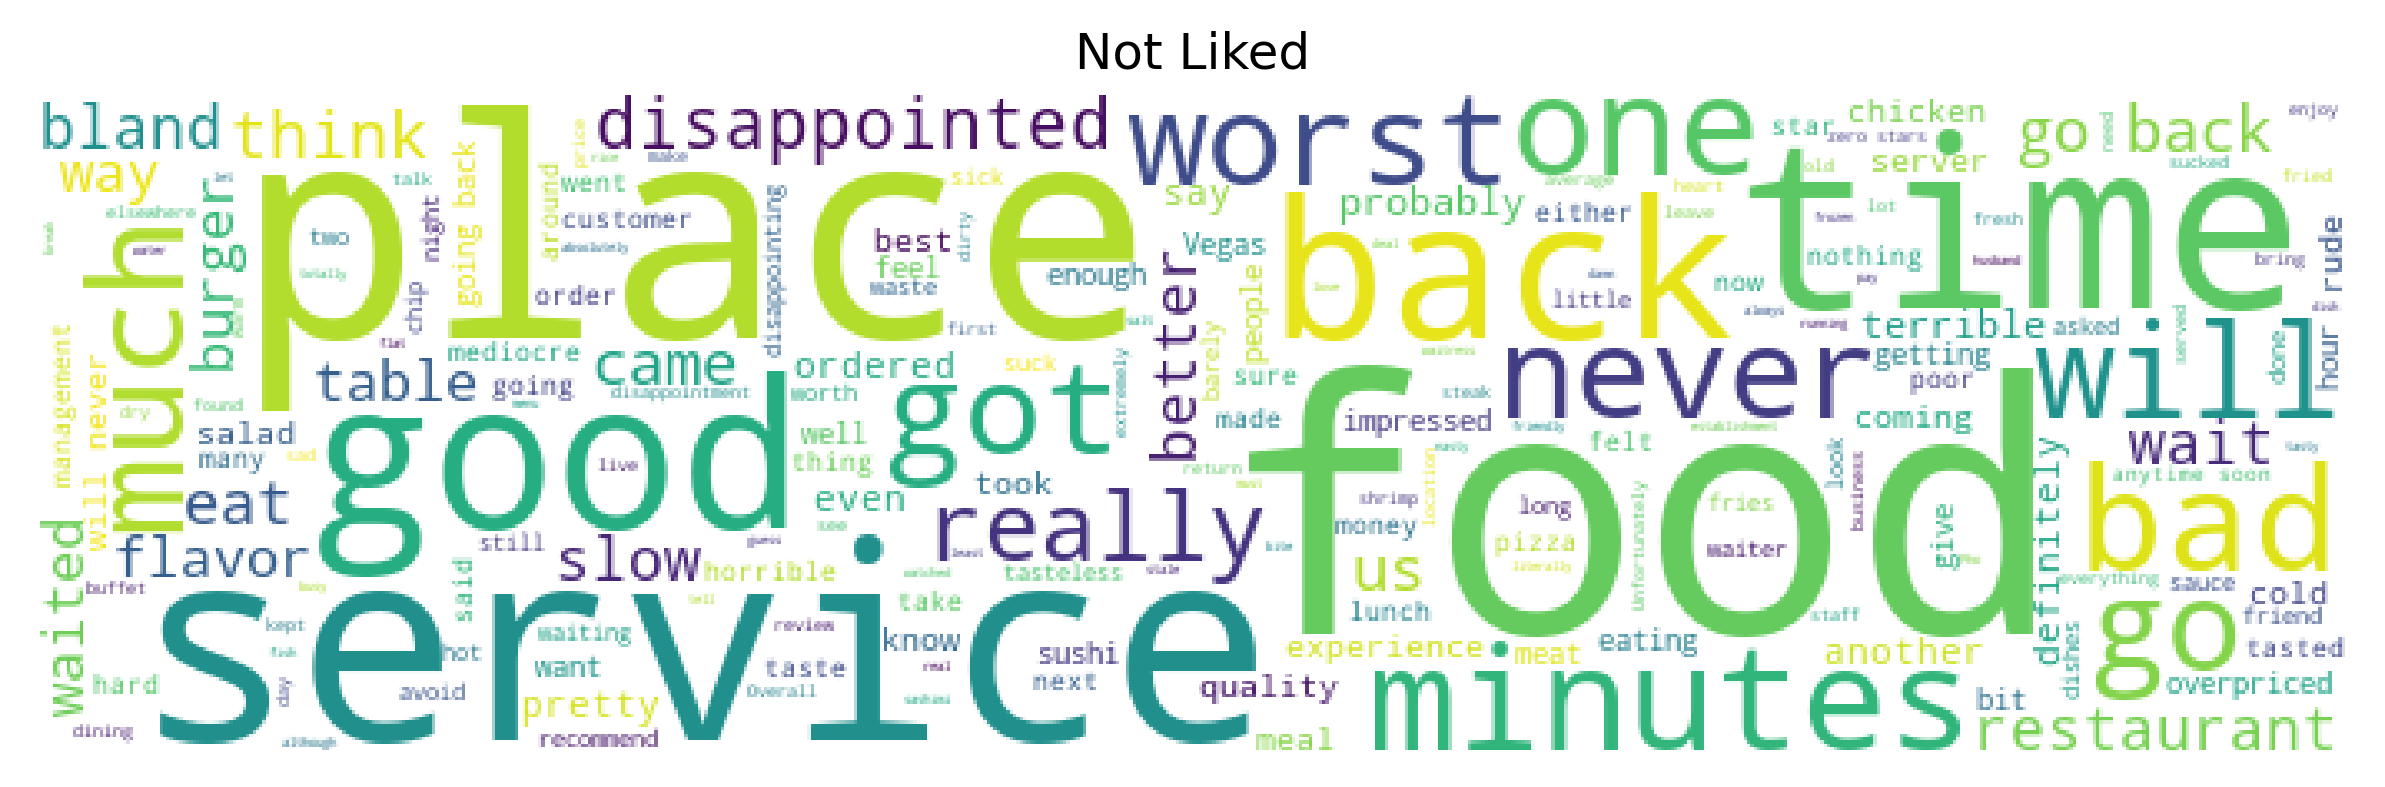

In [19]:
wordcl(not_liked, 'Not Liked')

# Text cleaning

1. Remove unwanted characters
2. Text normalization
3. Tokenization
4. lemmatization
5. Join the text

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [23]:
lemma = WordNetLemmatizer()

In [24]:
range(len(df))

range(0, 1000)

In [25]:
corpus = []

for i in range(len(df)):
    zomato_reviews = re.sub('[^a-zA-Z]', ' ', str(df['Review'][i])) #Text normalization#Clean the text
    zomato_reviews = zomato_reviews.lower() #Text normalization
    zomato_reviews = zomato_reviews.split() #Word tokenize
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    zomato_reviews = [lemma.lemmatize(word) for word in zomato_reviews if not word in set(all_stopwords)] #Lemmatization
    zomato_reviews = ' '.join(zomato_reviews) # Join sentences
    corpus.append(zomato_reviews)

In [26]:
corpus

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'a

# Model Building

In [27]:
# Feature Extraction

In [28]:
# Tf-IDF

In [29]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [30]:
y = df['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [31]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus)
x = x.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
nb = MultinomialNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)

print(f"Test Accuracy: {nb.score(xtest,ytest)}")

Test Accuracy: 0.74


In [35]:
print(confusion_matrix(ytest, ypred))

[[75 33]
 [19 73]]
